# Prediction on Animal Species

## Summary:
The data set we will be using is the Zoo (1990) data set provided by UC Irvine Machine Learning Repository. The data set stores 7 classes of animals and related attributes including animal name, hair, feathers etc are contained. In this project, we will use classification to classify a given animal to the most likely class.
## Introduction:
Background:
Predictive Question: How can classification be used in predicting animal species?
description of the dateset: The zoo data set contains 1 categorical attribute, 17 Boolean-valued attributes and 1 numerical attribute. The categorical attribute appears to be the class attribute. Detailed breakdowns are as follows: 
1. animal name: Unique for each instance 
2. hair: Boolean 
3. feathers: Boolean 
4. eggs: Boolean 
5. milk: Boolean 
6. airborne: Boolean 
7. aquatic: Boolean 
8. predator: Boolean 
9. toothed: Boolean 
10. backbone: Boolean 
11. breathes: Boolean 
12. venomous: Boolean 
13. fins: Boolean 
14. legs: Numeric (set of values: {0,2,4,5,6,8}) 
15. tail: Boolean 
16. domestic: Boolean 
17. catsize: Boolean 
18. type: Numeric (integer values in range [1,7])

## Methods & Results
We are going to use a K nearest neighbors analysis to classify the type of the animals using 16 variables including hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, domestic, catsize as our predictors. To predict the class of a new observation the K-nn classifier generally finds the k numbers of observations that are the nearest to the new observation in the training set.(Tiffany Timbers, Trevor Campbell, and etc., 2022) According to how those observations located on plot, we want to first take a glance of the class of the new observation. Further by using the information of predictors of the K-nn animals, we can reasonably predict the type.

In [121]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [122]:
#reading the data as a csv from the uci web server, with header = false as the data contains no header
zoo_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data", header = None)
#Adding column names to the data
colm = [ "animalName", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", 
        "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "type" ]
#Adding the columns to our zoo_data dataframe
zoo_data.columns = colm

In [123]:
zoo_data

,animalName,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [15]:
#saving the data as a csv file in our data directory
zoo_data.to_csv(r'./data/zoo.csv')

### Classification
Now we will use the training set to build an accurate model. Then use the test set to report the accuracy of the models, we will use the following algorithm:

K Nearest Neighbor(KNN)
<br>
Decision Tree
<br>
Support Vector Machine
<br>
Logistic Regression

In [124]:
#extracting the feature that will predict
feature = zoo_data[[ "hair", "feathers", "eggs", "milk", "airborne", 
                   "aquatic", "predator", "toothed", "backbone", "breathes", 
                   "venomous", "fins", "legs", "tail", "domestic", "catsize"]]
#making it as a X
X = feature
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [125]:
#taking the y values, the type
y = zoo_data['type']
y[0:5]

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

# KNN
Explain KNN in 2 lines

In [126]:
#splitting the dataset 80-20 for train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Training set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Training set: (80, 16) (80,)
Test set: (21, 16) (21,)


In [127]:
#training the model for different set of K values and finding the best K value
Ks = 81
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.        , 0.95238095, 0.95238095, 0.9047619 , 0.85714286,
       0.80952381, 0.85714286, 0.76190476, 0.76190476, 0.76190476,
       0.76190476, 0.76190476, 0.76190476, 0.76190476, 0.76190476,
       0.76190476, 0.76190476, 0.71428571, 0.61904762, 0.61904762,
       0.61904762, 0.61904762, 0.61904762, 0.61904762, 0.61904762,
       0.61904762, 0.61904762, 0.61904762, 0.61904762, 0.61904762,
       0.61904762, 0.61904762, 0.61904762, 0.57142857, 0.57142857,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.47619048, 0.42857143, 0.42857143, 0.42857143, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333

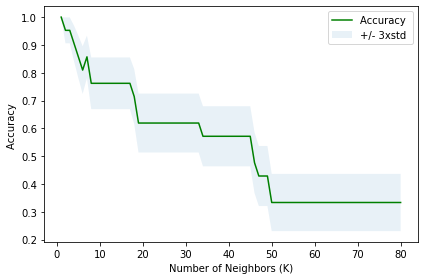

In [128]:
#plotting the aaccuracy for different K values
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [129]:
print( "The best accuracy was with the values", mean_acc.max(), "with k=", mean_acc.argmax()+1 )

The best accuracy was with the values 1.0 with k= 1


In [130]:
#so one last predict with K = 1, as K = 1 gives best
neigh = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)
yhat=neigh.predict(X_test)
accuracyScore = metrics.accuracy_score(y_test, yhat)
print("So the accuracy score for K = 1 is: " + str(accuracyScore))

So the accuracy score for K = 1 is: 1.0


In [131]:
#as the best accuracy was with K = 1
#using K = 1 for the final KNN model
#Final KNN model is here used the splited test part to train again for better training, and better prediction
final_knn_model = KNeighborsClassifier(n_neighbors = 1).fit(X,y)

### KNN Evaluation

In [132]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



# Decision Tree
Explain decission tree in 2 lines

In [133]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    decTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    decTree.fit(X_train,y_train)
    yhat=decTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.57142857, 0.61904762, 0.80952381, 0.80952381, 0.9047619 ,
       0.9047619 , 0.85714286, 0.9047619 , 0.9047619 , 0.85714286,
       0.85714286, 0.9047619 , 0.9047619 , 0.85714286, 0.9047619 ,
       0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 ,
       0.85714286, 0.85714286, 0.9047619 , 0.9047619 , 0.9047619 ,
       0.85714286, 0.85714286, 0.9047619 , 0.85714286, 0.9047619 ,
       0.9047619 , 0.9047619 , 0.85714286, 0.9047619 , 0.9047619 ,
       0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 ,
       0.9047619 , 0.9047619 , 0.85714286, 0.9047619 , 0.9047619 ,
       0.85714286, 0.9047619 , 0.9047619 , 0.9047619 ])

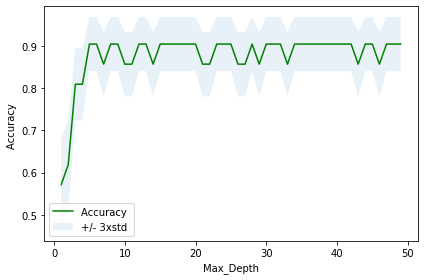

In [134]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max_Depth')
plt.tight_layout()
plt.show()

In [135]:
print( "The best accuracy was with the values", mean_acc.max(), "with max_depth =", mean_acc.argmax()+1) 

The best accuracy was with the values 0.9047619047619048 with max_depth = 5


In [136]:
#so one last predict with max depth = 5, as it gives best
decT = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
decT.fit(X_train,y_train)
yhat=decT.predict(X_test)
accuracyScore = metrics.accuracy_score(y_test, yhat)
print("So the accuracy score for max depth = 5 is: " + str(accuracyScore))

So the accuracy score for max depth = 5 is: 0.9047619047619048


In [137]:
#As Best is max depth = 5
#using max depth = 5 for the final decision tree
#Final decisison tree is here used the splited test part to train again for better training, and better prediction
Final_dec_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
Final_dec_Tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

### Decision Tree Evaluation

In [138]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      0.33      0.50         3
           7       0.67      1.00      0.80         4

    accuracy                           0.90        21
   macro avg       0.94      0.89      0.88        21
weighted avg       0.94      0.90      0.89        21



# Support Vector Machine
Explain SVM in 2 lines

In [139]:
svec = svm.SVC(kernel='poly')
svec.fit(X_train, y_train)

SVC(kernel='poly')

In [140]:
yhat = svec.predict(X_test)
acc = jaccard_score(y_test, yhat, average='micro')
print("So the Jaccard score for SVM is: " + str(acc))

So the Jaccard score for SVM is: 0.8260869565217391


In [141]:
#Final SVM is here used the splited test part to train again for better training, and better prediction
svec = svm.SVC(kernel='poly')
finalSVM = svec.fit(X, y) 

### SVM Evaluation

In [142]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      0.50      0.67         4

    accuracy                           0.90        21
   macro avg       0.89      0.92      0.86        21
weighted avg       0.97      0.90      0.91        21



# Logistic Regression
Exlplain LR in 2 lines

In [143]:
LR = LogisticRegression(C=0.07, solver='sag').fit(X_train, y_train)
yhat = LR.predict(X_test)
acc = jaccard_score(y_test, yhat, average='micro')
print("So the Jaccard score for Logistic Regression is: " + str(acc))

So the Jaccard score for Logistic Regression is: 0.68


In [144]:
#final LR model is here used the splited test part to train again for better training, and better prediction
finalLR = LogisticRegression(C=0.07, solver='sag').fit(X, y)

### Logistic Regression Evaluation

In [145]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       0.83      1.00      0.91         5
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       0.75      1.00      0.86         3
           7       1.00      0.25      0.40         4

    accuracy                           0.81        21
   macro avg       0.66      0.71      0.63        21
weighted avg       0.81      0.81      0.76        21



C:\Users\podda\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\podda\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\podda\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Citation
Tiffany Timbers, T. C. (2022, February 13). Data science: A first Introduction. Retrieved February 18, 2022, from https://datasciencebook.ca/ 